In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from collections import OrderedDict
from collections import Counter

In [13]:
print(pd.__version__)

# checking to make sure our virtual environment is running correctly 

2.1.0


In [14]:
df = pd.read_csv('healthcare.csv')

In [15]:
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [16]:
df.isna().sum()

# data seems pretty good to use

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Understanding datatype for plotting distribution for continous and discrete datatypes

To understand if it is a normal distribution problem

In [17]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### List comprehension to filter out discrete feature columns

Check if data type for each feature is equal to integer

/Users/shinjiyamashita/Desktop/DiabetesProject/shinji-ml-journey-/ml-venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinjiyamashita/Desktop/DiabetesProject/shinji-ml-journey-/ml-venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shinjiyamashita/Desktop/DiabetesProject/shinji-ml-journey-/ml-venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinjiyamashita/Desktop/DiabetesPro

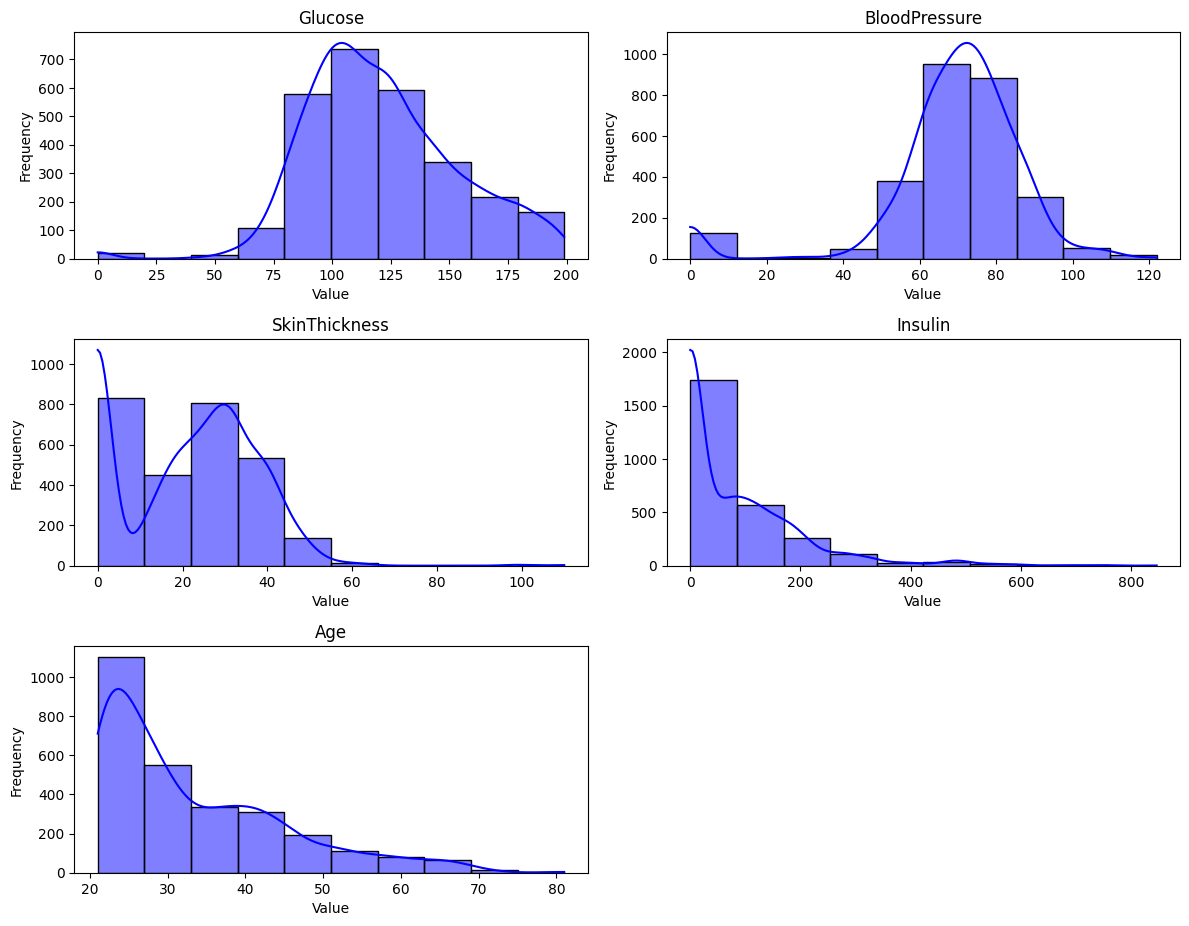

In [18]:

df1 = df.drop(columns=['Id', 'Outcome'])


discrete_features=[column_name for column_name in df1.columns if pd.api.types.is_integer_dtype(df1[column_name]) and column_name != 'Pregnancies']



#for feature in discrete_features:
    #sns.histplot(df1[feature], bins=10, kde=True, color='blue')
    

#fig, axs = plt.subplots(ncols=len(discrete_features))

#for index, feature in enumerate(discrete_features):
    #sns.histplot(df1[feature], bins=10, color='blue', ax=axs[index])
    


plt.figure(figsize=(12, 12))
for index, feature in enumerate(discrete_features):
    plt.subplot(4, 2, index + 1)
    sns.histplot(df1[feature], bins=10, kde=True, color='blue')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'{feature}')


plt.tight_layout()
plt.show()

#plt.figure(figsize=(8, 6))
#sns.histplot(df['Age'], bins=10, kde=True, color='blue')

#### Observation


From this correlation matrix, we can see that glucose and outcome has a positive correlation, which means that an increase
in the amount of glucose correlates with a greater likelihood of the presence of diabetes

<Axes: >

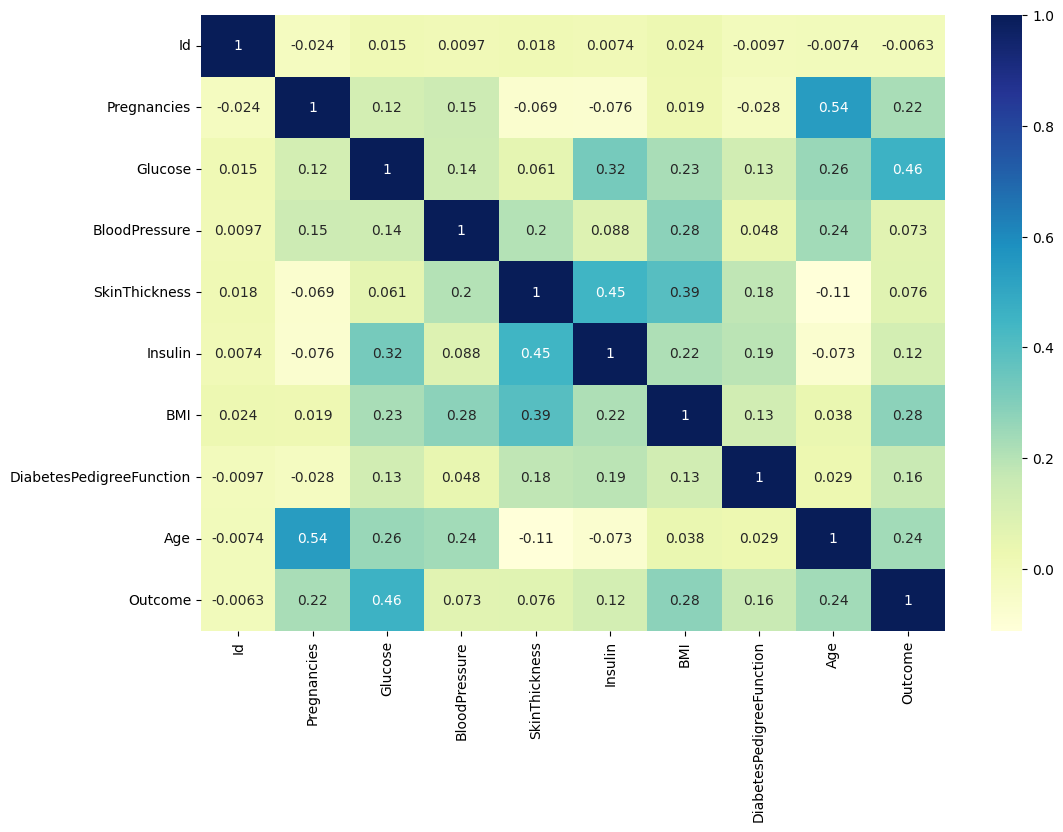

In [85]:
# visualizating correlation matrix to see if there are any correlations between features

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu") 

/Users/shinjiyamashita/Desktop/DiabetesProject/shinji-ml-journey-/ml-venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinjiyamashita/Desktop/DiabetesProject/shinji-ml-journey-/ml-venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinjiyamashita/Desktop/DiabetesProject/shinji-ml-journey-/ml-venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Boxplot of Glucose Concentration by Diabetes Status'}, xlabel='Outcome', ylabel='Glucose'>

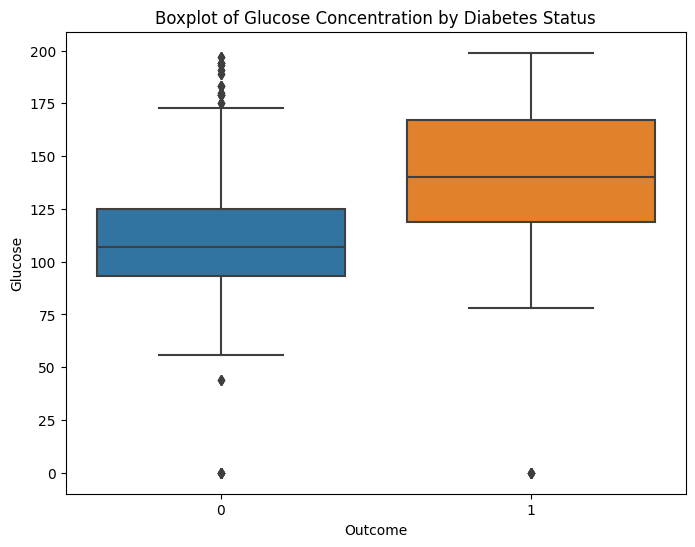

In [86]:
plt.figure(figsize=(8, 6))


plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Glucose Concentration')
plt.title('Boxplot of Glucose Concentration by Diabetes Status')
sns.boxplot(x='Outcome', y='Glucose', data=df)

Outcome
0    1816
1     952
Name: count, dtype: int64


<Axes: ylabel='Type'>

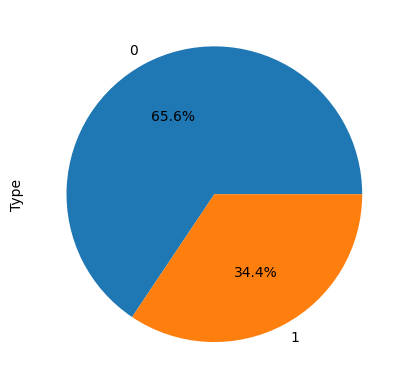

In [87]:
# check for imbalanced dataset


print(df["Outcome"].value_counts())


df.groupby('Outcome').size().plot(
    kind='pie',
    y="Outcome",
    label="Type",
    autopct='%1.1f%%'
)

In [19]:
X = df.drop(columns=['Id', 'Outcome'])

In [20]:
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
y = df['Outcome']
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [113]:
# perform a training test split 
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [114]:
print(y_test.shape)
print(X_train.shape)
c, b = X.shape
print(c)
print(b)

(692,)
(2076, 8)
2768
8


# Implementing Logistic Regression from scratch

#### Sigmoid Function
In this function, we are first coding the sigmoid function so once we compute our z value which consists of a dot product of our input features and weight parameters and bias. This computes a value between 0 and 1 which is necessary for binary logistic classification

In [93]:
# create the sigmoid activation function for logistic regression (return output of 0 or 1)

def sigmoid(x):
    
    g = 1 / (1 + np.exp(-x))
    
    
    return g



In [94]:
print(sigmoid(0))

0.5


#### Cost Function

We code the cost function which in this case is the binarycross entropy cost function which is different from MSE which we use for linear regression. We compute the cost function, so we know that it is decreasing after each iteration

In [95]:
def cost_one(actual, out):
    cost = actual*np.log(out)+(1-actual)*np.log(1-out)
    
    return cost

In [96]:
# implement gradient descent one iteration


def gradient_descent(X, y, w, b, sig, cost_one):
    
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    total_cost = 0
    
    for i in range(m):
        out = np.dot(X[i], w) + b
        apply_sig = sig(out) - y[i]
        total_cost += cost_one(y[i], sig(out))
        for j in range(n):
            dj_dw[j] += apply_sig * X[i][j] # access two dimensional arrays
        dj_db += apply_sig
        
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    total_cost = total_cost / -m
            
    return dj_dw, dj_db, total_cost # return the partial derivatives of both 

    
        
    
    


In [97]:
# run multiple iterations
            
            
w = np.zeros(X.shape[1])
b = 0
total_cost = 0


X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
  
    

def full_gradient(X, y, w_in, b_in, grad_desc, sig, lr, epochs, cost_one):
    
    costs = []
    
    for i in range(epochs):
        dj_dw, dj_db, curr_cost = grad_desc(X, y, w_in, b_in, sig, cost_one)
        w_in = w_in - lr * dj_dw
        b_in = b_in - lr * dj_db
        if (i % 10 == 0):
            costs.append(curr_cost)
        
    return w_in, b_in, costs # return final parameters after running gradient descent multiple times

    


In [98]:
final_w, final_b, costs = full_gradient(X_train, y_train, w, b, gradient_descent, sigmoid, 0.001, 1000, cost_one)

In [99]:
print(final_w)
print(final_b)
print(costs)

[ 0.16669887  0.06900136 -0.07916396  0.01985218  0.01724332 -0.01556585
  0.00430014  0.01527731]
-0.036131793393154296
[0.6931471805599105, 4.6933637525517735, 3.6176789322758593, 0.6863714681958044, 3.351946016488531, 0.6952910832092982, 3.317211986613084, 0.7409202637537943, 3.223501126065428, 0.7490021311532595, 3.1716603853195955, 0.760408381631554, 3.1358886562081447, 0.7658135074433529, 3.1130673936311424, 0.7687773611325492, 3.098182401054645, 0.7702751323115247, 3.0880183052377888, 0.7709866982050638, 3.080655641501738, 0.7712879539805112, 3.0749734881855706, 0.7713825674500732, 3.0703260913427415, 0.7713776176554298, 3.066341405775033, 0.7713277902821448, 3.062802625945156, 0.771260064161556, 3.059580421213329, 0.7711871491088024, 3.0565948004113292, 0.7711146452274226, 3.0537938565145444, 0.7710447741974703, 3.0511419659170835, 0.7709782716409648, 3.0486132400310115, 0.7709153102049591, 3.0461878723744746, 0.7708559224398908, 3.043850070948489, 0.7708001729934931, 3.0415868

#### cost function analysis

It seems to be oscillating, maybe we can try feature scaling?

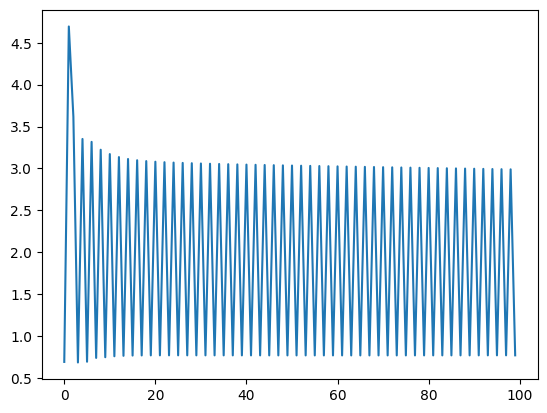

In [100]:
plt.plot(list(range(100)), costs)

#### importance of feature scaling

Here we apply the standard scale which standardizes our data. This means that our mean is centered around zero and 

In [101]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)


final_w, final_b, costs_1 = full_gradient(X_train_standardized, y_train, w, b, gradient_descent, sigmoid, 0.01, 1000, cost_one)


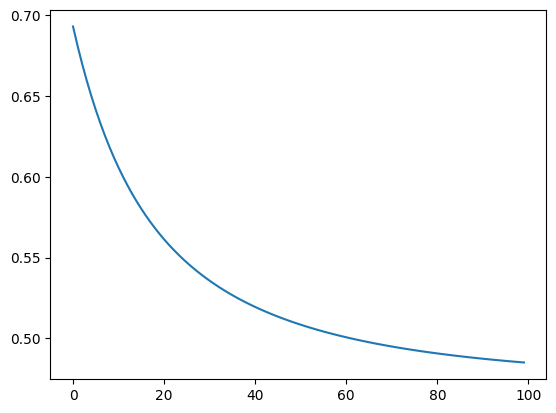

In [102]:
plt.plot(list(range(100)), costs_1)

In [103]:
print(costs_1)

[0.6931471805599105, 0.6811414539126726, 0.6700420199563538, 0.6597706897221053, 0.6502552456199915, 0.6414293822493694, 0.6332325111204067, 0.6256094723847091, 0.6185101889290676, 0.611889290437209, 0.6057057280041246, 0.5999223939435006, 0.5945057566461421, 0.589425516656589, 0.5846542873897904, 0.5801673019387427, 0.575942146061457, 0.57195851653515, 0.5681980035062121, 0.5646438951500018, 0.561281002811099, 0.558095504767125, 0.555074806806877, 0.5522074179076496, 0.5494828394167882, 0.5468914662746392, 0.5444244989511187, 0.5420738648999209, 0.5398321484593153, 0.5376925282446706, 0.5356487211841213, 0.533694932445102, 0.5318258105860892, 0.5300364073450634, 0.5283221415450485, 0.5266787666578923, 0.5251023416212715, 0.5235892045513137, 0.5221359490351112, 0.5207394027240415, 0.519396607981284, 0.5181048043652386, 0.5168614127557, 0.5156640209514429, 0.5145103705874594, 0.5133983452368801, 0.5123259595777901, 0.511291349518288, 0.5102927631848333, 0.5093285526891684, 0.50839716659

In [104]:
# creating our predictions, our threshold should be 0.5


def predictions(final_w, final_b, X, sig):
    
    m = X.shape[0]
    predics = np.zeros(m)
    
    for i in range(m):
        calc = np.dot(X[i], final_w) + final_b
        apply_sig = sig(calc)
        if (apply_sig >= 0.5):
            predics[i] = 1
        else:
            predics[i] = 0

    return predics

        
        
    
    
    



# Logistic Regression model performance against scikit model


#### General Observations
   
We can see that there is high bias and the model seems to be relatively underfitting. It seems to also pertain a high level of variance as the model doesn't seem to generalize well to unseen data. It seems that a different algorithm is required. Down below, we will also implement the KNN model. 

### Our model

#### Jtrain = 77.2% accuracy
#### Jtest = 75% accuracy

### Scikit Learn model

#### Jtrain = 77.8% accuracy






In [105]:
# our accuracy

prediction = predictions(final_w, final_b, X_train_standardized, sigmoid)
print(prediction.shape)


print('Train Accuracy: %f'%(np.mean(prediction == y_train) * 100))

(2076,)
Train Accuracy: 77.263969


In [116]:
# improving performance?

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_standardized, y_train)

predictions = logisticRegr.predict(X_train_standardized)


print('Train Accuracy: %f'%(np.mean(predictions == y_train) * 100))


#X_test = X_test.to_numpy()
#y_test = y_test.to_numpy()


#X_test_standardized = scaler.fit_transform(X_test)

#predictions1 = logisticRegr.predict(X_test_standardized)


#print('Train Accuracy: %f'%(np.mean(predictions1 == y_test) * 100))


Train Accuracy: 77.842004
Train Accuracy: 76.589595


In [128]:
#test data

X_test_standardized = scaler.fit_transform(X_test)

print(X_test_standardized.shape)
print(X_train_standardized.shape)
#prediction1 = predictions(final_w, final_b, X_test_standardized)
#print(prediction1.shape)


#print('Train Accuracy: %f'%(np.mean(prediction1 == y_test) * 100))


#print(sigmoid(0))


print(X_test_standardized[0])
su = np.dot(final_w, X_test_standardized[0]) + final_b
print(sigmoid(su))
print(y_test[0])



(692, 8)
(2076, 8)
[-0.55974331 -0.91110142 -0.81133488 -1.34423814 -0.73892647 -0.23567484
 -1.05181983 -0.95135296]
0.11211408830895252
0


In [129]:
# other visualizations (plotting decision boundary?)


def predictions1(final_w, final_b, X, sig):
    
    m = X.shape[0]
    predics = np.zeros(m)
    
    for i in range(m):
        calc = np.dot(X[i], final_w) + final_b
        apply_sig = sig(calc)
        if (apply_sig >= 0.5):
            predics[i] = 1
        else:
            predics[i] = 0

    return predics


In [131]:
# our analysis, conclusions, and deployment?

prediction1 = predictions1(final_w, final_b, X_test_standardized, sigmoid)

print('Train Accuracy: %f'%(np.mean(prediction1 == y_test) * 100))

Train Accuracy: 75.578035


# Implementing KNN model from scratch

#### We will first calculate the euclidean distance between two vectors. It is also known as the L2 norm due to the p value in minoskwi formula distance

In [11]:


x1 = np.array([1, 2, 3, 4])
x2 = np.array([3, 3, 5, 6])

math.sqrt(np.sum((x1-x2)**2))






    
    


3.605551275463989

In [12]:
def euclidean_distance(x1, x2):
    distance = np.sum((x1-x2)**2)
    distance = math.sqrt(distance)
    
    return distance
    

In [120]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [74]:
X_train_1 = X_train_1[0:3]

In [121]:
def knn_fit(x, x_rest, y_rest, euc_dis, k):
    
    distances = {}
    m = x_rest.shape[0]
    for i in range(m): 
        dist = euc_dis(x, x_rest[i])
        distances[i] = dist
    # sort distances from biggest to least (how many depends on the number of neighbors)
    distances = OrderedDict(sorted(distances.items(), key=lambda x:x[1])[:k])
    
    # majority class label? (how to retrieve y) ()
    categories = [y_rest[key] for key in distances] # retreiving the outcome for those distances
    
    cats = Counter(categories)
    
    return cats.most_common(1)[0][0]
    
    
    
    

In [109]:
print(y_train_1[:3])

[0 0 1]


In [132]:
dists = knn_fit(X_train[4], X_train, y_train, euclidean_distance, 3)
print(dists)

1


In [137]:
print(y_train[4])


X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

1


In [161]:
predictions2 = []



for x in X_train:
    output = knn_fit(x, X_train, y_train, euclidean_distance, 5)
    predictions2.append(output)



#print('Train Accuracy: %f'%(np.mean(predictions == y_train) * 100))





In [162]:

print('Test Accuracy: %f'%(np.mean(predictions2 == y_train) * 100))

Test Accuracy: 93.352601


In [152]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [153]:
y_pred = classifier.predict(X_test)

In [154]:
print('Train Accuracy: %f'%(np.mean(y_pred == y_test) * 100))

Train Accuracy: 93.352601
